In [1]:
from scipy.ndimage.measurements import label as bwlabel
from skimage.measure import regionprops
from pylab import *

import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
sns.set()
rcParams['figure.figsize'] = (12, 8)

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("poster")

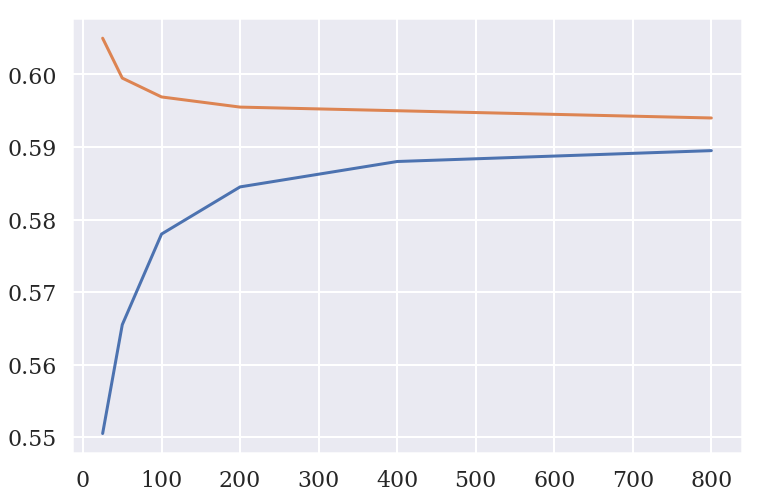

In [3]:
ppiex = array([[0.5505, 0.5655, 0.578, 0.5845, 0.588, 0.5895],
              [0.605, 0.5995, 0.5969, 0.5955, 0.595, 0.594]])

L = array([25, 50, 100, 200, 400, 800])

plot(L, ppiex[0])
plot(L, ppiex[1])
show()

$$ p_{\Pi = x} = p_c C_xL^{-\frac{1}{\nu}} $$
 
$$ p_{x_1} - p_{x_2} = (C_{x_1} - C_{x_2})L^{-\frac{1}{\nu}} $$

$$ \log (p_{x_1} - p_{x_2}) = \log (C_{x_1} - C_{x_2}) - \frac{1}{\nu} \log L $$

$$ \log (p_{\Pi = 0.8} - p_{\Pi = 0.3}) = \log (C_{0.3} - C_{0.8}) - \frac{1}{\nu} \log L $$


Found nu = 1.36652008919 and C_diff = 0.568054171894 using linear regression.


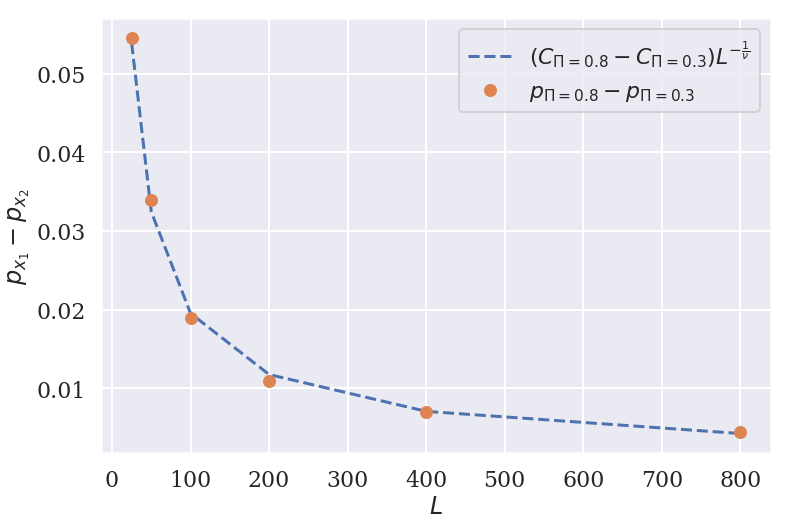

In [4]:
from scipy.stats import linregress

px_diff = ppiex[1] - ppiex[0]
slope, intercept, _, _, _ = linregress(log(L), log(px_diff))

C_diff = exp(intercept)
nu = - 1.0 / slope

print("Found nu = {} and C_diff = {} using linear regression.".format(nu, C_diff))

plot(L, C_diff*L**(-(1.0 / nu)), '--', label=r"$(C_{\Pi = 0.8} - C_{\Pi = 0.3})L^{-\frac{1}{\nu}}$")
plot(L, px_diff, "o", label=r"$p_{\Pi = 0.8} - p_{\Pi = 0.3}$")

xlabel(r"$L$")
ylabel(r"$p_{x_1} - p_{x_2}$")
legend()
show()